In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Paths
INPUT_PATH = "../data/happiness_cleaned.csv"

# Load cleaned data
df = pd.read_csv(INPUT_PATH)

# Quick look
print("Data shape:", df.shape)
df.head(10)


Data shape: (6, 5)


,Country,Year,GDP_per_capita,Happiness_score,Life_expectancy
0,United Kingdom,2021,42300.0,7.22,81.2
1,Greece,2021,18100.0,6.00,82.0
2,Spain,2021,35000.0,6.40,83.1
3,Germany,2021,35000.0,7.00,81.0
4,Italy,2021,35000.0,6.50,83.4
5,Sweden,2021,53000.0,7.36,82.8


In [2]:
# Summary stats for numeric columns
df.describe()

# Check number of unique countries
print("Number of countries:", df["Country"].nunique())
print("Countries in dataset:", df["Country"].unique())


Number of countries: 6
Countries in dataset: <StringArray>
['United Kingdom', 'Greece', 'Spain', 'Germany', 'Italy', 'Sweden']
Length: 6, dtype: str


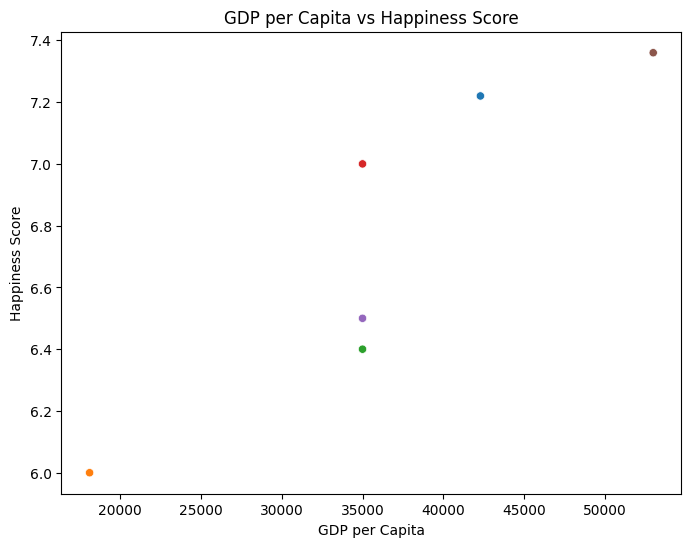

In [4]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="GDP_per_capita", y="Happiness_score", hue="Country")
plt.title("GDP per Capita vs Happiness Score")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend([],[], frameon=False)  # optional: remove legend for clarity
plt.show()


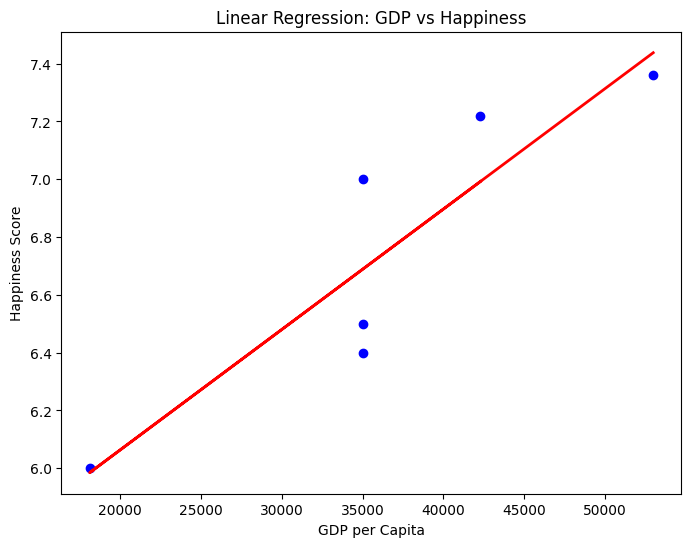

Slope: 0.0416 Happiness points per $1000 GDP
Intercept: 5.2309


In [12]:
# Prepare data
X = df[["GDP_per_capita"]].values  # 2D array for sklearn
y = df["Happiness_score"].values  # target

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predictions for plotting
y_pred = model.predict(X)

# Plot regression line
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.title("Linear Regression: GDP vs Happiness")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.show()

slope_per_1000 = model.coef_[0] * 1000
intercept = model.intercept_

# Print slope and intercept

print(f"Slope: {slope_per_1000:.4f} Happiness points per $1000 GDP")
print(f"Intercept: {intercept:.4f}")

                 GDP_per_capita  Happiness_score  Life_expectancy
GDP_per_capita         1.000000         0.897094         0.112377
Happiness_score        0.897094         1.000000        -0.325299
Life_expectancy        0.112377        -0.325299         1.000000


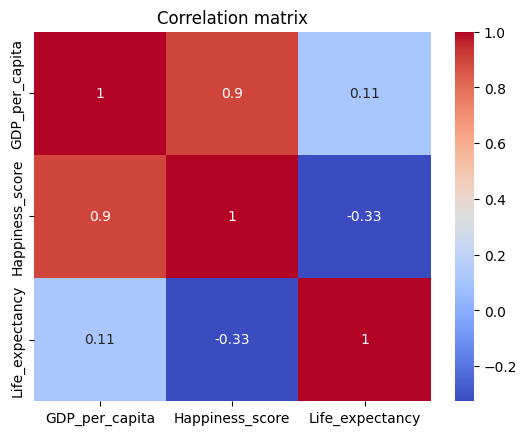

In [14]:
# Compute correlations
corr = df[["GDP_per_capita", "Happiness_score", "Life_expectancy"]].corr()
print(corr)

# Optional heatmap for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()
